In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Election_Data.csv to Election_Data.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
df = pd.read_csv(('Election_Data.csv'))

In [ ]:
df.head()

,Unnamed,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed                  1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [ ]:
print(df['vote'].nunique())
print(df['vote'].value_counts().sort_values())

2
Conservative     462
Labour          1063
Name: vote, dtype: int64


In [ ]:
print(df['gender'].nunique())
print(df['gender'].value_counts().sort_values())

2
male      713
female    812
Name: gender, dtype: int64


In [ ]:
df.describe()

,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [ ]:
df.head()

,Unnamed,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
df.isnull().sum()

Unnamed                    0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,Unnamed,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [ ]:
df.shape

(1525, 10)

Univariate Analysis






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed i

Text(0.5, 1.0, 'political knowledge boxplot')

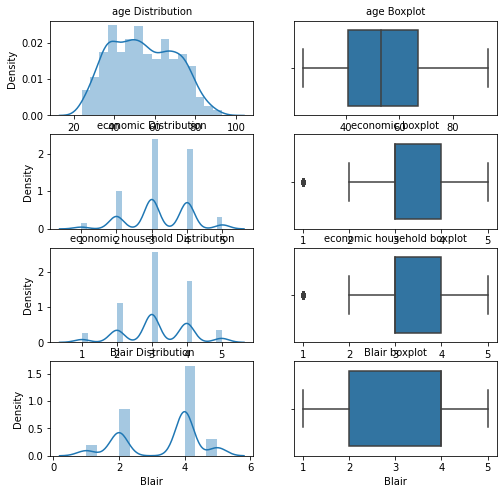

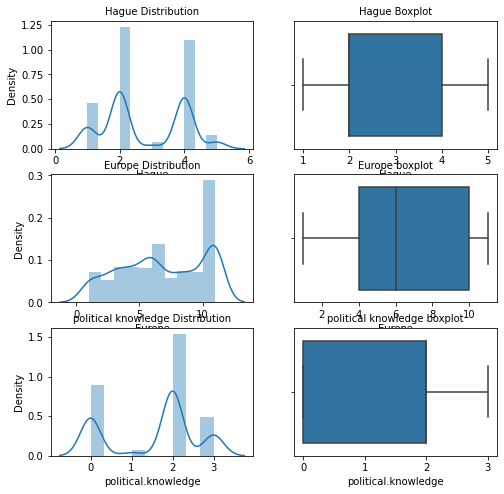

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(8,8)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(8,8)

a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

Bivariate and Multivariate Analysis

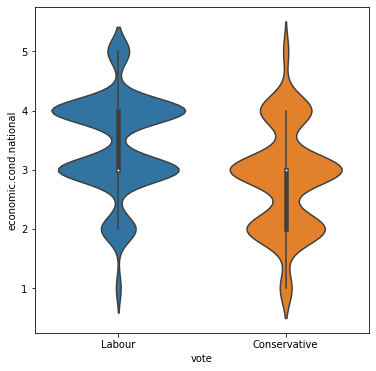

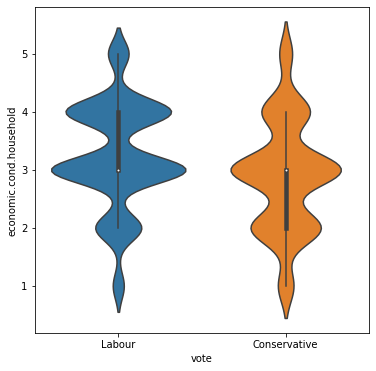

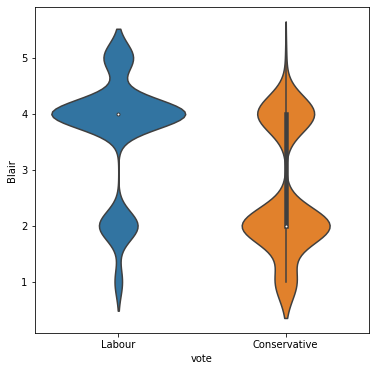

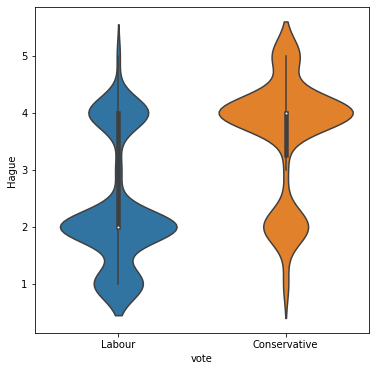

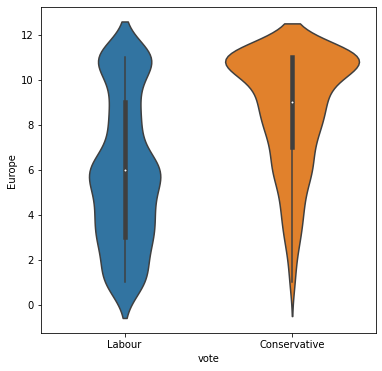

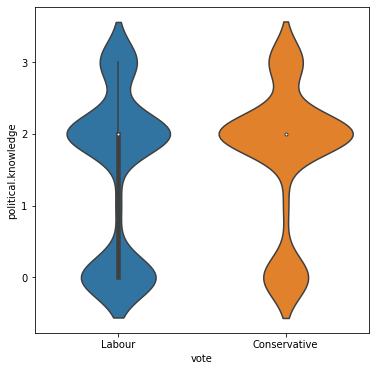

In [ ]:
plt.figure(figsize=(6,6))
sns.violinplot(x="vote", y="economic.cond.national",data=df)
plt.figure(figsize=(6,6))
sns.violinplot(x="vote", y="economic.cond.household",data=df)
plt.figure(figsize=(6,6))
sns.violinplot(x="vote", y="Blair",data=df) 
plt.figure(figsize=(6,6))
sns.violinplot(x="vote", y="Hague",data=df)
plt.figure(figsize=(6,6))
sns.violinplot(x="vote", y="Europe",data=df)
plt.figure(figsize=(6,6))
sns.violinplot(x="vote", y="political.knowledge",data=df)
plt.show()

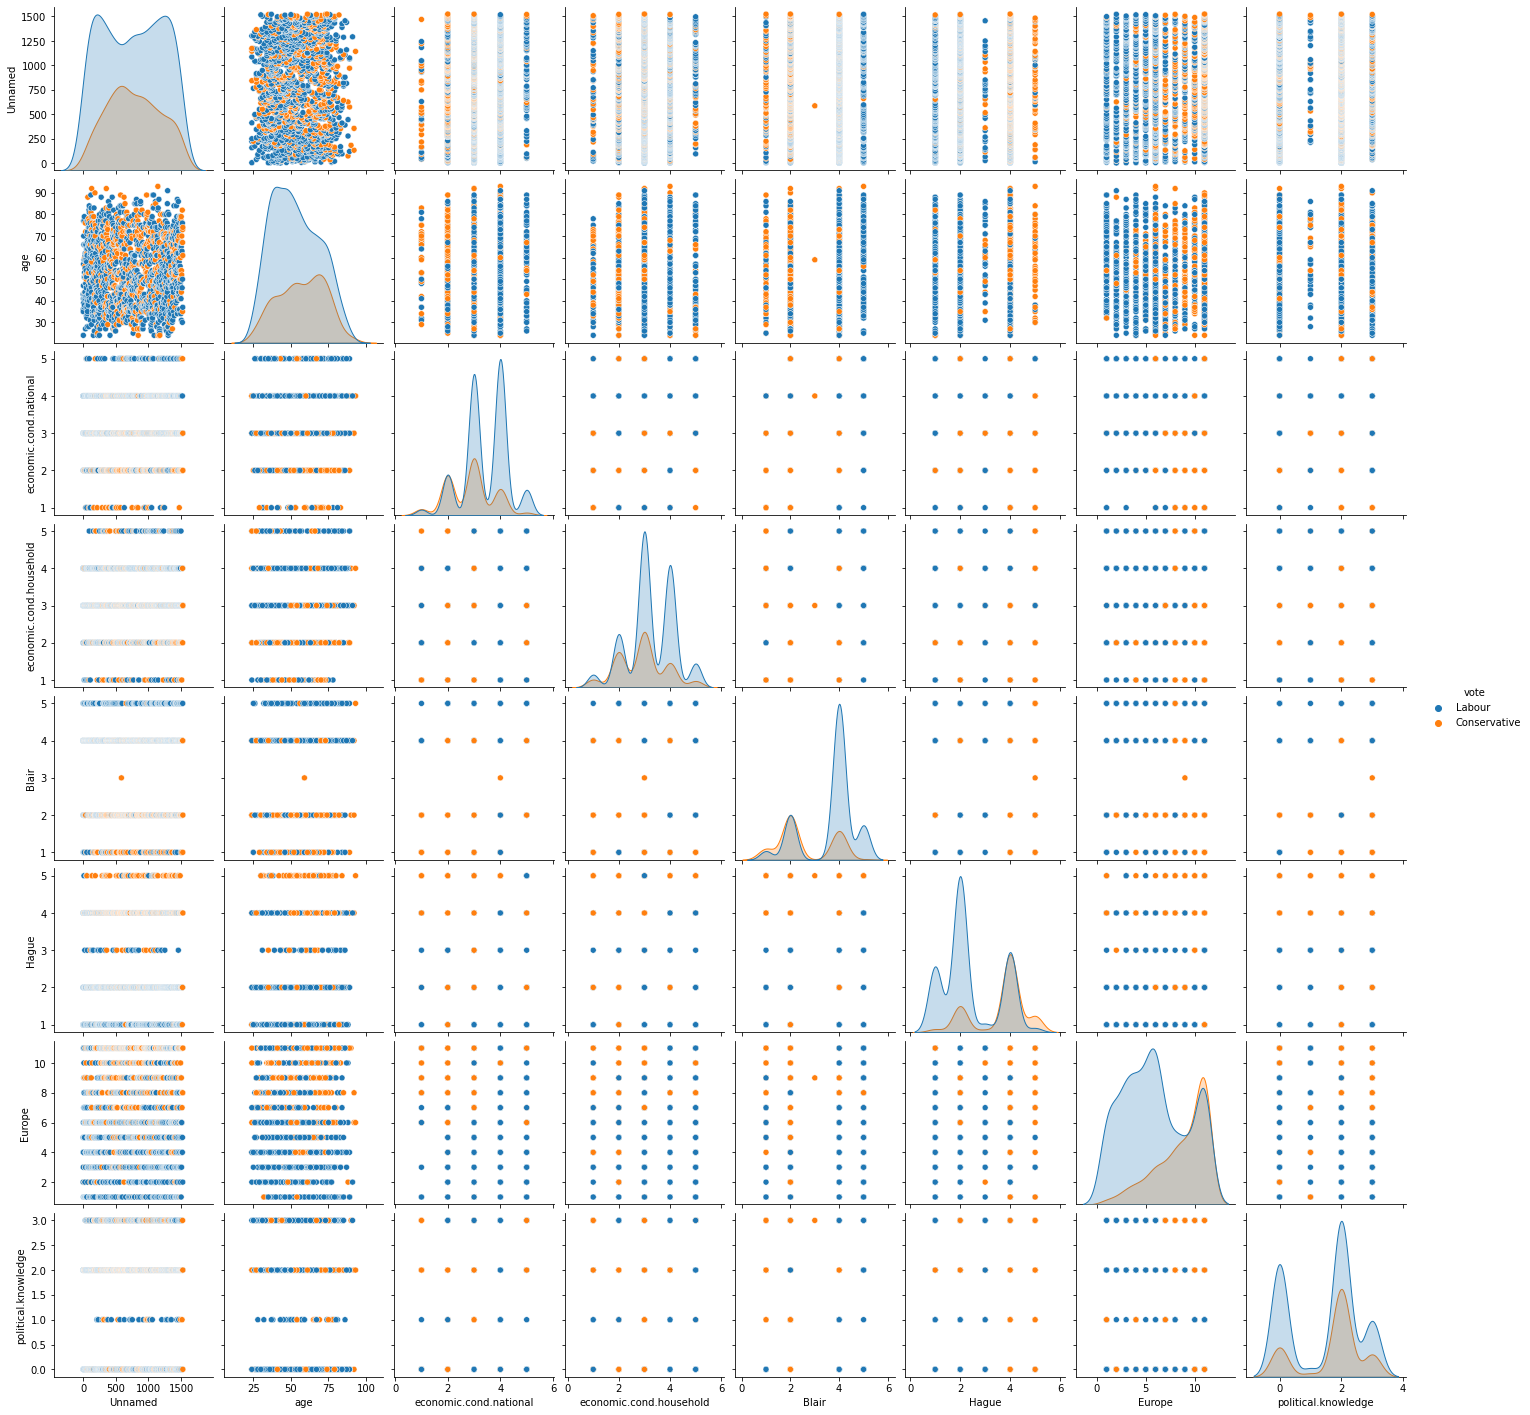

In [ ]:
sns.pairplot(df, hue='vote')

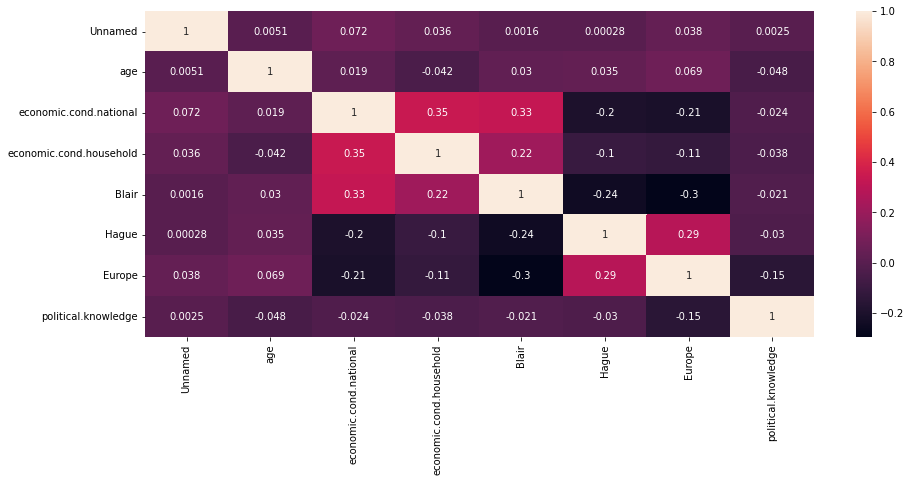

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

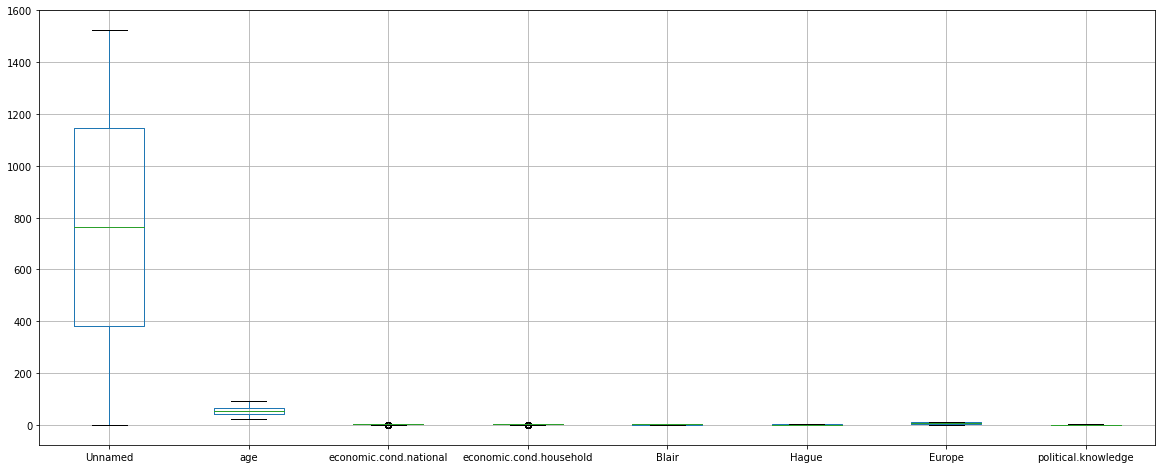

In [ ]:
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [ ]:
Class = ['vote', 'gender']
df1 =pd.get_dummies(df, columns=Class,drop_first=True)
df1.head()

,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,1,43,3,3,4,1,2,2,1,0
1,2,36,4,4,4,4,5,2,1,1
2,3,35,4,4,5,2,3,2,1,1
3,4,24,4,2,2,1,4,0,1,0
4,5,41,2,2,1,1,6,2,1,1


In [ ]:
df1= df1.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)
df1.sample(10)


,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
1023,1024,72,3,3,2,2,11,2,1,1
1133,1134,55,4,3,4,5,11,2,0,0
557,558,77,5,2,4,2,4,2,1,1
614,615,40,3,4,2,2,9,2,0,0
1509,1510,67,3,3,5,2,4,2,1,0
581,582,46,3,3,2,4,6,0,1,0
711,712,75,2,2,4,4,6,0,0,0
1149,1150,46,2,1,4,4,9,0,1,0
748,749,69,1,1,4,2,11,0,0,0
1322,1323,69,4,2,4,2,11,0,1,0


In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df1.iloc[:, 1:9].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])


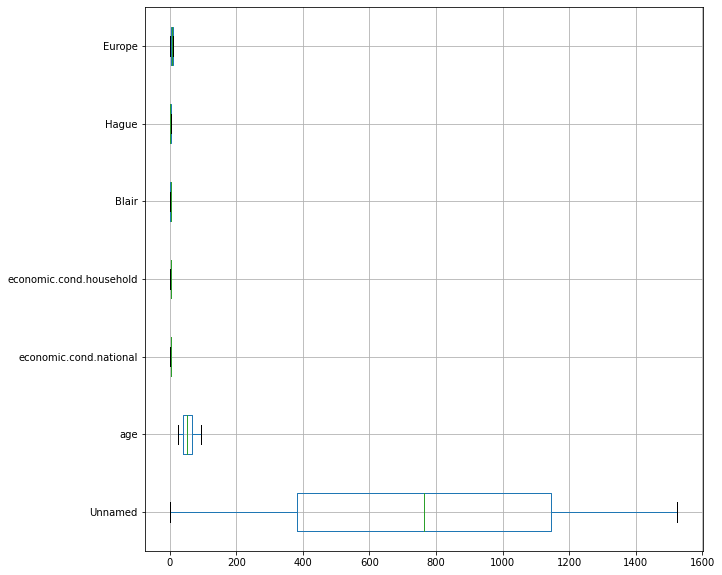

In [ ]:
plt.figure(figsize=(10,10))
df1.iloc[:, 0:7].boxplot(vert=0)

In [ ]:
num=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

In [ ]:
df1[num] = df1[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
df1.head()

,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
0,1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,1.0,0
1,2,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1.0,1
2,3,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1.0,1
3,4,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,1.0,0
4,5,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1.0,1


In [ ]:
df1.describe()

,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,0.437425,0.502295,0.474754,0.583607,0.436721,0.572852,0.514098,0.697049,0.467541
std,440.373894,0.227699,0.243696,0.252939,0.293706,0.307676,0.329754,0.361105,0.459685,0.499109
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,382.000000,0.246377,0.428571,0.428571,0.250000,0.250000,0.300000,0.000000,0.000000,0.000000
50%,763.000000,0.420290,0.428571,0.428571,0.750000,0.250000,0.500000,0.666667,1.000000,0.000000
75%,1144.000000,0.623188,0.714286,0.714286,0.750000,0.750000,0.900000,0.666667,1.000000,1.000000
max,1525.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the data

In [ ]:
X=df1.drop('IsLabour_or_not',axis=1)
Y=df1['IsLabour_or_not']

In [ ]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.837863167760075
[[234  98]
 [ 75 660]]
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       332
         1.0       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



AUC ROC curve for LDA Train

the auc 0.890 


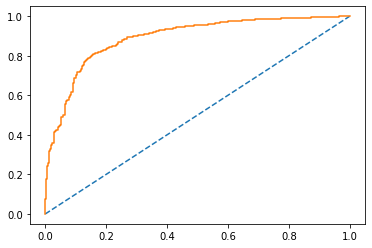

In [ ]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [ ]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8209606986899564
[[ 87  43]
 [ 39 289]]
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       130
         1.0       0.87      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC ROC curve for LDA Test

the auc curve 0.885 


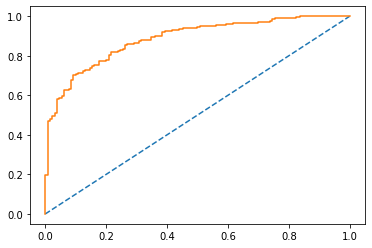

In [ ]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

In [ ]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8388003748828491
[[229 103]
 [ 69 666]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [ ]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.632069,0.367931
1,0.182289,0.817711
2,0.188143,0.811857
3,0.177017,0.822983
4,0.052277,0.947723


In [ ]:
Logistic_model.score(X_train,Y_train)

0.8388003748828491

AUC ROC curve for Logistic Regression Train

AUC: 0.890


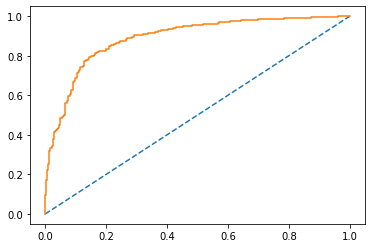

In [ ]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       130
         1.0       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [ ]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.918304,0.081696
1,0.697594,0.302406
2,0.336600,0.663400
3,0.486745,0.513255
4,0.152532,0.847468


AUC ROC curve for Logistic Regression Test

AUC: 0.884


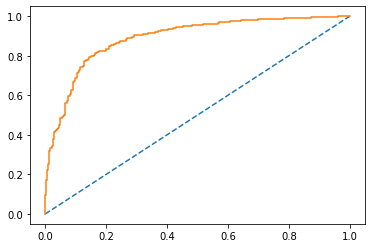

In [ ]:

probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8369259606373008
[[241  91]
 [ 83 652]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       332
         1.0       0.88      0.89      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



the auc 0.889 


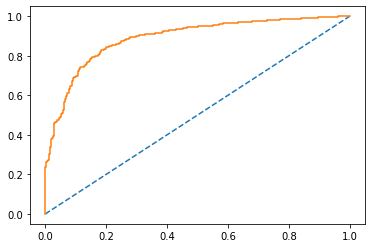

In [ ]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [ ]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8275109170305677
[[ 95  35]
 [ 44 284]]
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       130
         1.0       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.886 


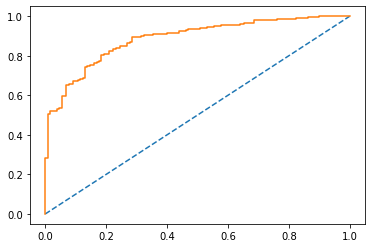

In [ ]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

KNN

In [ ]:
x= df1.drop("IsLabour_or_not",axis=1)
y=df1["IsLabour_or_not"]

In [ ]:
x.head()

,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,2,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,3,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,4,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,5,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


In [ ]:
from scipy.stats import zscore

In [ ]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [ ]:
x.head(10)

,Unnamed,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,1,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,2,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,3,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,4,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,5,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169
5,6,-0.457295,-0.302622,0.947305,0.566716,1.018544,-0.827714,0.422643,1.067169
6,7,0.179402,-1.475425,-1.312594,0.566716,1.018544,1.295778,0.422643,1.067169
7,8,1.452797,-0.302622,0.947305,0.566716,-1.419886,-1.737782,-1.424148,1.067169
8,9,-0.966652,-0.302622,-0.182644,0.566716,1.018544,1.295778,-1.424148,-0.937059
9,10,1.007109,-0.302622,-1.312594,1.418187,-1.419886,1.295778,0.422643,1.067169


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [ ]:
print(KNN_model_score)

0.7944006999125109


In [ ]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[185 166]
 [ 69 723]]
              precision    recall  f1-score   support

         0.0       0.73      0.53      0.61       351
         1.0       0.81      0.91      0.86       792

    accuracy                           0.79      1143
   macro avg       0.77      0.72      0.74      1143
weighted avg       0.79      0.79      0.78      1143



AUC ROC Curve KNN Train


the auc 0.846 


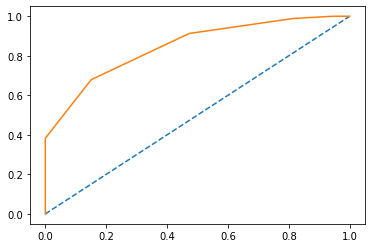

In [ ]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [ ]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.680628272251309


In [ ]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 36  75]
 [ 47 224]]
              precision    recall  f1-score   support

         0.0       0.43      0.32      0.37       111
         1.0       0.75      0.83      0.79       271

    accuracy                           0.68       382
   macro avg       0.59      0.58      0.58       382
weighted avg       0.66      0.68      0.67       382



AUC ROC Curve KNN Test

the auc curve 0.643 


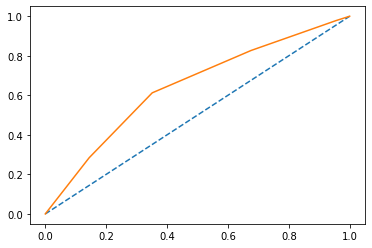

In [ ]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.7620297462817148
[[147 204]
 [ 68 724]]
              precision    recall  f1-score   support

         0.0       0.68      0.42      0.52       351
         1.0       0.78      0.91      0.84       792

    accuracy                           0.76      1143
   macro avg       0.73      0.67      0.68      1143
weighted avg       0.75      0.76      0.74      1143



In [ ]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.6727748691099477
[[ 25  86]
 [ 39 232]]
              precision    recall  f1-score   support

         0.0       0.39      0.23      0.29       111
         1.0       0.73      0.86      0.79       271

    accuracy                           0.67       382
   macro avg       0.56      0.54      0.54       382
weighted avg       0.63      0.67      0.64       382



In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.7944006999125109
[[185 166]
 [ 69 723]]
              precision    recall  f1-score   support

         0.0       0.73      0.53      0.61       351
         1.0       0.81      0.91      0.86       792

    accuracy                           0.79      1143
   macro avg       0.77      0.72      0.74      1143
weighted avg       0.79      0.79      0.78      1143



In [ ]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.680628272251309
[[ 36  75]
 [ 47 224]]
              precision    recall  f1-score   support

         0.0       0.43      0.32      0.37       111
         1.0       0.75      0.83      0.79       271

    accuracy                           0.68       382
   macro avg       0.59      0.58      0.58       382
weighted avg       0.66      0.68      0.67       382



In [ ]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.31413612565445026,
 0.31151832460732987,
 0.31937172774869105,
 0.32722513089005234,
 0.32460732984293195,
 0.31937172774869105,
 0.31413612565445026,
 0.31413612565445026,
 0.32198952879581155,
 0.32198952879581155]

AUC ROC curve after n classifier for train data set

the auc curve 0.720 


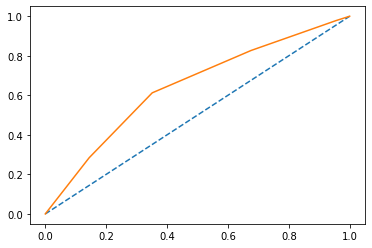

In [ ]:

probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

AUC ROC curve after n classifier for test data set

the auc curve 0.609 


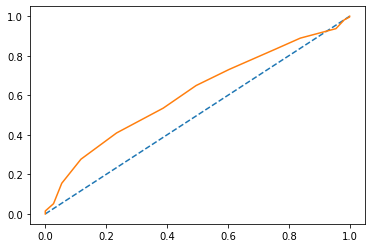

In [ ]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

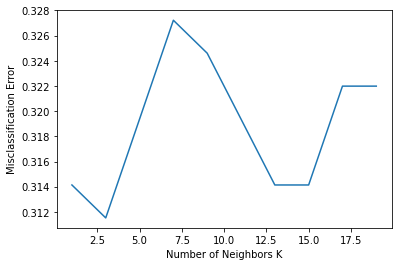

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Bagging Train

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

1.0
[[332   0]
 [  0 735]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       332
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



AUC _ROC Curve Bagging Train

AUC: 1.000


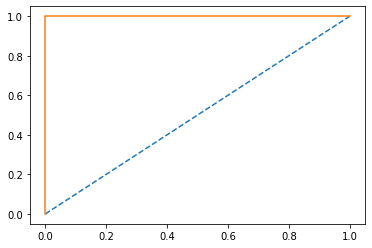

In [ ]:

probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

Bagging Test

In [ ]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8078602620087336
[[ 91  39]
 [ 49 279]]
              precision    recall  f1-score   support

         0.0       0.65      0.70      0.67       130
         1.0       0.88      0.85      0.86       328

    accuracy                           0.81       458
   macro avg       0.76      0.78      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC _ROC  Curve Bagging Test

AUC: 0.882


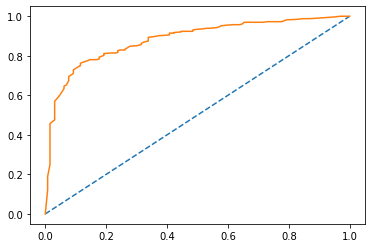

In [ ]:

probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

Boosting Train

Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [ ]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.865979381443299
[[249  83]
 [ 60 675]]
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       332
         1.0       0.89      0.92      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.86      1067



AUC: 0.934


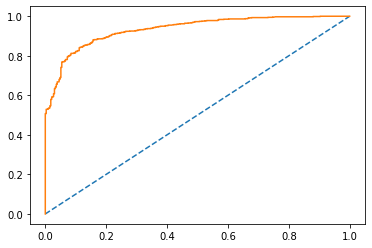

In [ ]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:

y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.9109653233364574
[[241  91]
 [ 83 652]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       332
         1.0       0.93      0.95      0.94       735

    accuracy                           0.91      1067
   macro avg       0.90      0.89      0.89      1067
weighted avg       0.91      0.91      0.91      1067



AUC _ROC Curve Boosting Train

AUC: 0.968


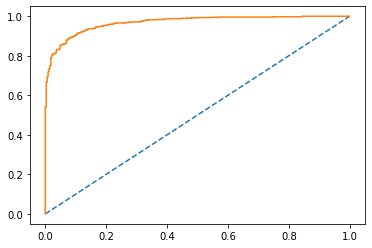

In [ ]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

ADA Boosting Test

In [ ]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8100436681222707
[[ 95  35]
 [ 44 284]]
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       130
         1.0       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.876


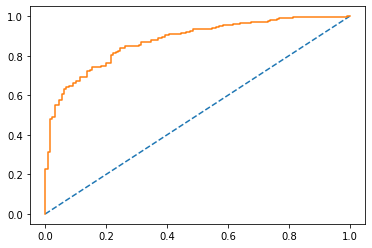

In [ ]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [ ]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8362445414847162
[[ 95  35]
 [ 44 284]]
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       130
         1.0       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.900


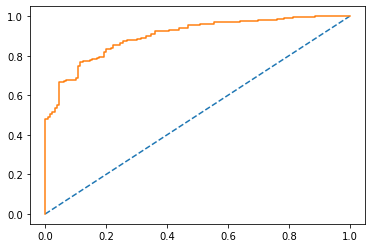

In [ ]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
cart1=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart1,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [ ]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.971883786316776
[[309  23]
 [  7 728]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       332
         1.0       0.97      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.96      0.97      1067
weighted avg       0.97      0.97      0.97      1067



AUC _ROC Curve Bagging Train

AUC: 0.997


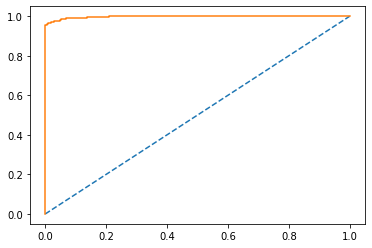

In [ ]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

Bagging Test

In [ ]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8296943231441049
[[ 96  34]
 [ 44 284]]
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       130
         1.0       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458



AUC _ROC Curve Bagging Test

AUC: 0.900


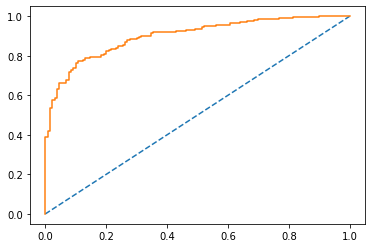

In [ ]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);